# Imports

In [1]:
#https://www.kaggle.com/code/karakoza22/sentiment-analysis
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize,regexp_tokenize
import seaborn as sns
import warnings
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
warnings.filterwarnings('ignore')
# mpl.style.use("ggplot")
from textblob import TextBlob
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from nltk.corpus import stopwords
from gensim.models.tfidfmodel import TfidfModel
from gensim.corpora.dictionary import Dictionary
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from langdetect import detect_langs
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import contractions
from tqdm import tqdm
# import plotly.express as px

# Exploring Dataset

In [3]:
df = pd.read_csv("F:/SE project/IMDB Dataset.csv")
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
# sns.countplot(df['sentiment'])
# plt.show()

Classes are balanced

# Cleaning Sentiment

In [5]:
def cleaning_sentiment(df,col_name):
    porter = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    w = df[col_name].apply(lambda x :x.lower())
    w = w.apply(lambda x: re.sub('(<.*?>)|(\n)|([^\w\s\.\,])|([_])|([.])|([,])|(\s\s+)|([ا-ي])','',x))
    w = w.apply(lambda x: contractions.fix(x))
    w = w.apply(lambda x: ' '.join([porter.stem(i) for i in word_tokenize(x) if i not in stop_words]))
    return w

In [6]:
df['review'] = cleaning_sentiment(df,'review')


In [63]:
# df=pd.read_csv('clean_data.csv')

# df.to_csv('clean_data.csv')

# Feature Extraction

In [64]:
# def extracting_len_of_sentiment (df,col_name):
#    w = df[col_name].apply(lambda x :x.lower())
#    len_of_review = [len(word_tokenize(i)) for i in w] 
#    return len_of_review

In [2]:
# df['n_of_words'] = extracting_len_of_sentiment(df,'review')
# df.head()

NameError: name 'extracting_len_of_sentiment' is not defined

In [9]:
# lb = LabelBinarizer()
# df['sentiment'] = lb.fit_transform(df['sentiment'])
# lb.classes_

In [ ]:
df['list_of_words'] = df['review'].apply(lambda x:str(x).split()) 

# Most common words in positive, and negative sentiment

In [ ]:
pos_sent = df[df['sentiment']==1]
neg_sent = df[df['sentiment']==0]


In [ ]:
df.replace(to_replace="positive",value=1,inplace=True)
df.replace(to_replace="negative",value=0,inplace=True)
df

,review,sentiment,n_of_words,list_of_words
0,one review mention watch 1 oz episod hook righ...,1,163,"[one, review, mention, watch, 1, oz, episod, h..."
1,wonder littl product film techniqu unassum old...,1,84,"[wonder, littl, product, film, techniqu, unass..."
2,thought wonder way spend time hot summer weeke...,1,85,"[thought, wonder, way, spend, time, hot, summe..."
3,basic famili littl boy jake think zombi closet...,0,64,"[basic, famili, littl, boy, jake, think, zombi..."
4,petter mattei love time money visual stun film...,1,125,"[petter, mattei, love, time, money, visual, st..."
...,...,...,...,...
49995,thought movi right good job creativ origin fir...,1,77,"[thought, movi, right, good, job, creativ, ori..."
49996,bad plot bad dialogu bad act idiot direct anno...,0,55,"[bad, plot, bad, dialogu, bad, act, idiot, dir..."
49997,cathol taught parochi elementari school nun ta...,0,114,"[cathol, taught, parochi, elementari, school, ..."
49998,go disagre previou comment side maltin one sec...,0,113,"[go, disagre, previou, comment, side, maltin, ..."


In [13]:
# common = Counter([item for i in pos_sent['list_of_words'] for item in i])
# temp_pos = pd.DataFrame(common.most_common(20))
# temp_pos.columns = ['Common_words','count']

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

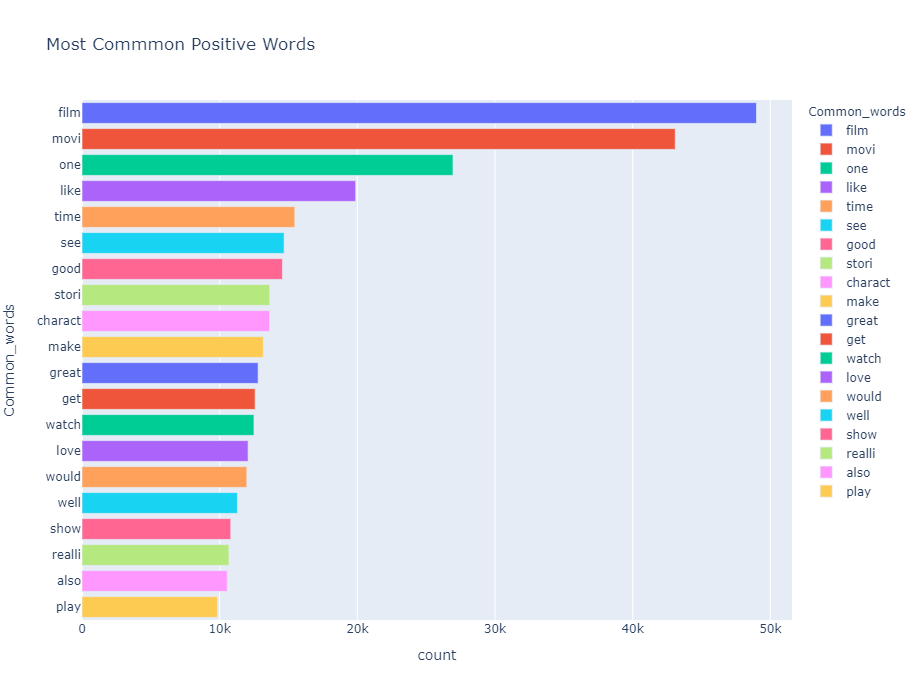

In [ ]:
# fig = plt.bar(temp_pos, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
#              width=700, height=700,color='Common_words')
# fig.show()

In [ ]:
# common = Counter([item for i in neg_sent['list_of_words'] for item in i])
# temp_neg = pd.DataFrame(common.most_common(20))
# temp_neg.columns = ['Common_words','count']

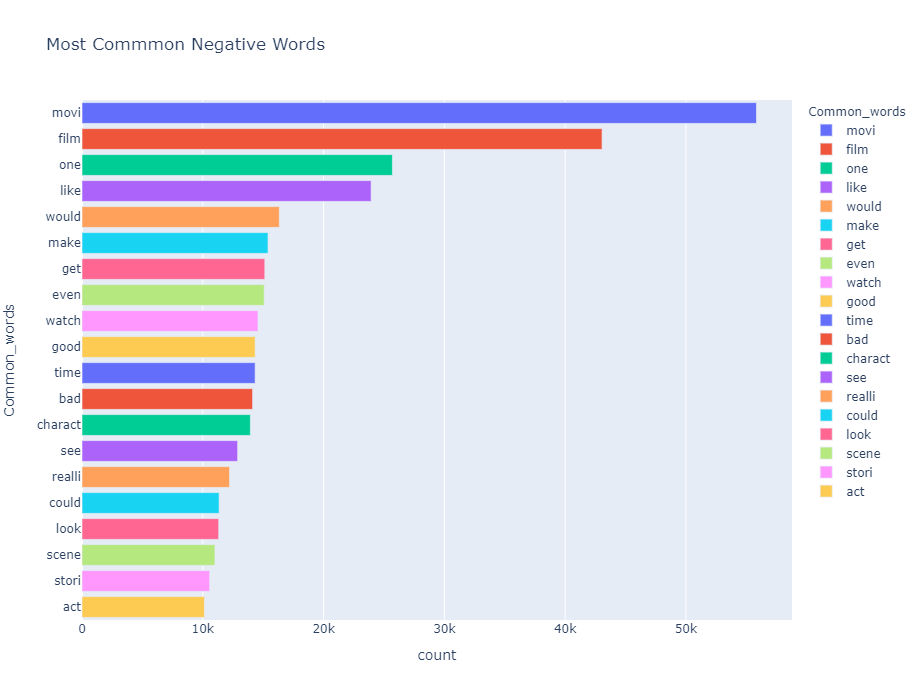

In [ ]:
# fig = plt.bar(temp_neg, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
#              width=700, height=700,color='Common_words')
# fig.show()

In [14]:
X = df['review']
y = df['sentiment']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# stratify = y to train  equally on both classes

# Count Vectorizer

In [16]:
vect = CountVectorizer()
X_train_count_vectorizer=vect.fit_transform(X_train)
X_test_count_vectorizer=vect.transform(X_test)
print(X_train_count_vectorizer.shape, X_test_count_vectorizer.shape)


(40000, 156171) (10000, 156171)


# tf-idf Vectorizer

In [17]:
tf =TfidfVectorizer()
X_train_tfidf_vectorizer=tf.fit_transform(X_train)
X_test_tfidf_vectorizer=tf.transform(X_test)
print(X_train_tfidf_vectorizer.shape, X_test_tfidf_vectorizer.shape)

(40000, 156171) (10000, 156171)


# Modeling
try not to use trees when you have many feature like this, you will see in testing set the result of trees

In [18]:

# def testing_various_clf (X_train,X_test,y_train,y_test):
#     ones = [i for i in y_train if i==1]
#     print(f"model trained on: {len(ones)} of ones, while: {(len(y_train)-len(ones))} of zeros")
#     models = [("logistic Regression",LogisticRegression()),("Decision Tree",DecisionTreeClassifier()), ("MultinomialNB",MultinomialNB())]
#     for name,model in models:
#         print(f"{'-'*88}\n{name}\n{'-'*88}")
#         clf = model.fit(X_train,y_train)
#         y_pred=clf.predict(X_test)
#         # sentiment=clf.predict()
#         models_arr.append(clf)
#         print(f"Recall score: {round(recall_score(y_test,y_pred),3)}, precision score: {round(precision_score(y_test,y_pred),3)}, f1-score: {round(f1_score(y_test,y_pred),3)},accuracy score: {round(accuracy_score(y_test,y_pred),3)}\n")
#         print(pd.DataFrame(confusion_matrix(y_test,y_pred)))    
#         print(f"number of unique predicted classes: {np.unique(y_pred)}")
        

In [37]:
#accuracy and precision matrix 
models_arr=[]
ones = [i for i in y_train if i==1]
print(f"model trained on: {len(ones)} of ones, while: {(len(y_train)-len(ones))} of zeros")
X_train=X_train_count_vectorizer
X_test=X_test_count_vectorizer
#models = [("logistic Regression",LogisticRegression()),("Decision Tree",DecisionTreeClassifier()), ("MultinomialNB",MultinomialNB())]
model=LogisticRegression()
clf_1 = model.fit(X_train,y_train)
y_pred=clf_1.predict(X_test)
models_arr.append(clf_1)

print(f"Recall score: {round(recall_score(y_test,y_pred),3)}, precision score: {round(precision_score(y_test,y_pred),3)}, f1-score: {round(f1_score(y_test,y_pred),3)},accuracy score: {round(accuracy_score(y_test,y_pred),3)}\n")
print(pd.DataFrame(confusion_matrix(y_test,y_pred)))    
print(f"number of unique predicted classes: {np.unique(y_pred)}")

model=DecisionTreeClassifier()
clf_2 = model.fit(X_train,y_train)
y_pred=clf_2.predict(X_test)
models_arr.append(clf_2)
print(f"Recall score: {round(recall_score(y_test,y_pred),3)}, precision score: {round(precision_score(y_test,y_pred),3)}, f1-score: {round(f1_score(y_test,y_pred),3)},accuracy score: {round(accuracy_score(y_test,y_pred),3)}\n")
print(pd.DataFrame(confusion_matrix(y_test,y_pred)))    
print(f"number of unique predicted classes: {np.unique(y_pred)}")


model=MultinomialNB()
clf_3 = model.fit(X_train,y_train)
y_pred=clf_3.predict(X_test)
models_arr.append(clf_3)
print(f"Recall score: {round(recall_score(y_test,y_pred),3)}, precision score: {round(precision_score(y_test,y_pred),3)}, f1-score: {round(f1_score(y_test,y_pred),3)},accuracy score: {round(accuracy_score(y_test,y_pred),3)}\n")
print(pd.DataFrame(confusion_matrix(y_test,y_pred)))    
print(f"number of unique predicted classes: {np.unique(y_pred)}")

model trained on: 20000 of ones, while: 20000 of zeros
Recall score: 0.889, precision score: 0.876, f1-score: 0.882,accuracy score: 0.882

      0     1
0  4370   630
1   555  4445
number of unique predicted classes: [0 1]
Recall score: 0.729, precision score: 0.729, f1-score: 0.729,accuracy score: 0.729

      0     1
0  3643  1357
1  1355  3645
number of unique predicted classes: [0 1]
Recall score: 0.843, precision score: 0.866, f1-score: 0.854,accuracy score: 0.856

      0     1
0  4345   655
1   783  4217
number of unique predicted classes: [0 1]


# Performance on Count vectorized data

In [19]:
testing_various_clf(X_train_count_vectorizer,X_test_count_vectorizer,y_train,y_test)

model trained on: 20000 of ones, while: 20000 of zeros
----------------------------------------------------------------------------------------
logistic Regression
----------------------------------------------------------------------------------------
Recall score: 0.889, precision score: 0.876, f1-score: 0.882,accuracy score: 0.882

      0     1
0  4370   630
1   555  4445
number of unique predicted classes: [0 1]
----------------------------------------------------------------------------------------
Decision Tree
----------------------------------------------------------------------------------------
Recall score: 0.733, precision score: 0.724, f1-score: 0.728,accuracy score: 0.726

      0     1
0  3601  1399
1  1337  3663
number of unique predicted classes: [0 1]
----------------------------------------------------------------------------------------
MultinomialNB
----------------------------------------------------------------------------------------
Recall score: 0.843, precis

# Performance on tdidf vectorized data

In [ ]:
# testing_various_clf(X_train_tfidf_vectorizer,X_test_tfidf_vectorizer,y_train,y_test)

model trained on: 20000 of ones, while: 20000 of zeros
----------------------------------------------------------------------------------------
logistic Regression
----------------------------------------------------------------------------------------
Recall score: 0.904, precision score: 0.883, f1-score: 0.893,accuracy score: 0.892

      0     1
0  4400   600
1   478  4522
number of unique predicted classes: [0 1]
----------------------------------------------------------------------------------------
Decision Tree
----------------------------------------------------------------------------------------
Recall score: 0.732, precision score: 0.726, f1-score: 0.729,accuracy score: 0.728

      0     1
0  3621  1379
1  1340  3660
number of unique predicted classes: [0 1]
----------------------------------------------------------------------------------------
MultinomialNB
----------------------------------------------------------------------------------------
Recall score: 0.856, precis

In [60]:
def predict_sentiment(review, vectorizer, model):
    review_tfidf_vectorizer = vectorizer.transform([review])
    sentiment = model.predict(review_tfidf_vectorizer)[0]
    print (sentiment)
    if sentiment == 0:
        return 'Negative'
    elif sentiment == 1:
        return 'Positive'
    else:
        return 'Unknown'

# assume that 'tf' and 'clf' are the vectorizer and model objects, respectively
new_review = "i hate this movie"
predicted_sentiment = predict_sentiment(new_review, tf, clf_1)
print(predicted_sentiment)
predicted_sentiment = predict_sentiment(new_review, tf, clf_2)
print(predicted_sentiment)
predicted_sentiment = predict_sentiment(new_review, tf, clf_3)
print(predicted_sentiment)


[1]
Positive
[1]
Positive
[1]
Positive


In [46]:
def find_duplicates(arr):
    d = {}
    duplicates = []
    for s in arr:
        if s in d:
            d[s] += 1
        else:
            d[s] = 1
    for s in d:
        if d[s] > 1:
            duplicates.append(s)
    return duplicates

In [50]:

find_duplicates((['positive','neggative','positive']))

['positive']

# flask application (GUI) is in the temp.py file

In [52]:
# from flask import Flask, render_template, request

# app = Flask(__name__)

# @app.route('/', methods=['GET', 'POST'])
# def index():
#     if request.method == 'POST':
#         inp1 = request.form['input1']
#         inp2 = request.form['input2']
#         temp=[]
#         display(inp1, inp2)
#         temp.append(predict_sentiment(inp2, tf, clf_1))
#         # print(predicted_sentiment)
#         temp.append(predict_sentiment(inp2, tf, clf_2))
#         # print(predicted_sentiment)
#         temp.append(predict_sentiment(inp2, tf, clf_3))
#         # print(predicted_sentiment)
        
#         inp3 = 'the output will b here' # data processing and function here ___________________
        
#         out1 = find_duplicates(temp)
#         return render_template('process.html', inp1=inp1, inp2=inp2 , inp3=out1)
#     else:
#         return render_template('index.html')


# #you can add ur ml model here or send the files to a different function and do the processing there
# def display(inp1, inp2):
#     print(inp1, inp2)

# if __name__=='__main__':
#     app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
